In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv('/content/Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

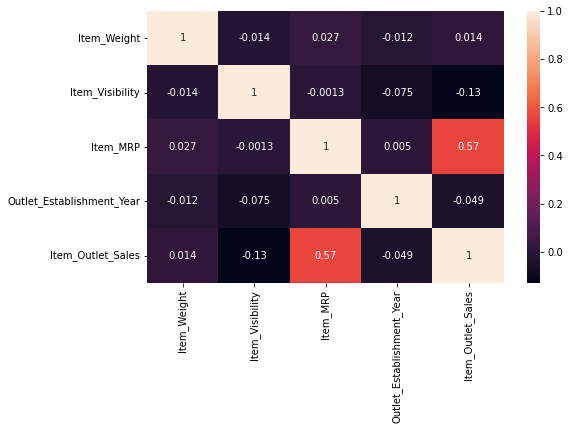

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


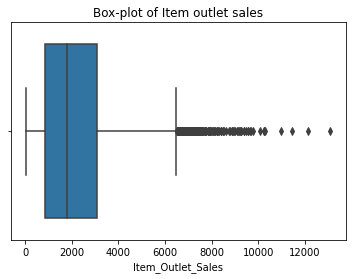

In [17]:
plt.title('Box-plot of Item outlet sales')
sns.boxplot('Item_Outlet_Sales',data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


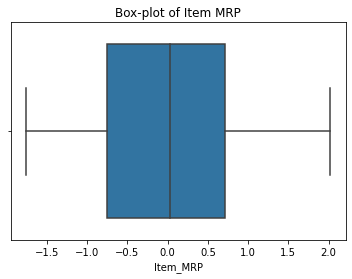

In [19]:
plt.title('Box-plot of Item MRP')
sns.boxplot('Item_MRP',data=train)

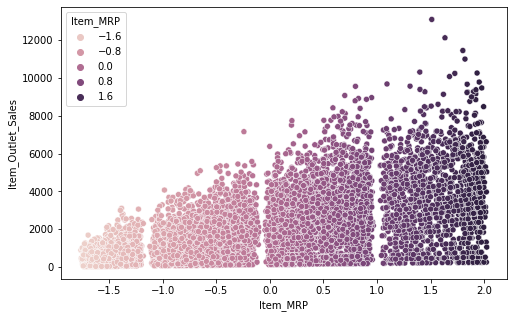

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=train)

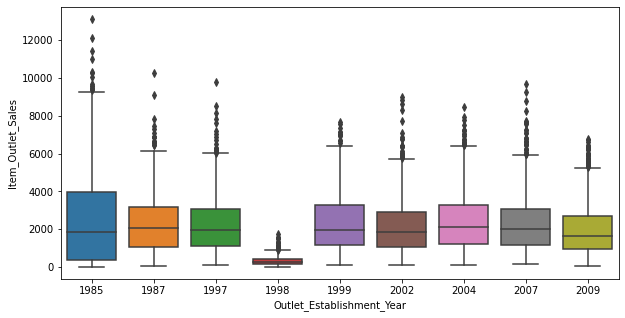

In [39]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)


In [11]:
train.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)
train.Item_Weight.isna().sum()

#impute missing values in Outlet_Size using mode
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0], inplace=True)
train.Outlet_Size.isna().sum()

0

In [12]:
!pip install category_encoders
import category_encoders as ce
#create an object of OneHotEncorder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                            'Item_Type',
                            'Outlet_Identifier',
                            'Outlet_Size',
                            'Outlet_Location_Type',
                            'Outlet_Type'],use_cat_names=True)

#encode the variables
train = OHE.fit_transform(train)

     |████████████████████████████████| 82 kB 400 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(train.Item_MRP).reshape(-1,1))

train.Item_MRP = scaler.transform(np.array(train.Item_MRP).reshape(-1,1))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_X = train.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
train_Y = train['Item_Outlet_Sales']

train_x, valid_x, train_y, valid_y = train_test_split(train_X, train_Y, test_size=0.25) 

train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [41]:

LR = LinearRegression()

LR.fit(train_x, train_y)
train_pred = LR.predict(train_x)
valid_pred = LR.predict(valid_x)

print('RMSE on train data: ', mean_squared_error(train_y, train_pred)**(0.5))
print('RMSe on validation data: ', mean_squared_error(valid_y, valid_pred)**(0.5))

RMSE on train data:  1134.8347901540217
RMSe on validation data:  1106.6195365108026


In [42]:
RFR = RandomForestRegressor(max_depth=10)
RFR.fit(train_x, train_y)

train_pred = RFR.predict(train_x)
valid_pred = RFR.predict(valid_x)

print('RMSE on train data :', mean_squared_error(train_y, train_pred)**(0.5))

RMSE on train data : 903.9808123249761


In [43]:
LS=Lasso()
LS.fit(train_x, train_y)

train_pred = LS.predict(train_x)
valid_pred = LS.predict(valid_x)

print('RMSE on train data :', mean_squared_error(train_y, train_pred)**(0.5))


RMSE on train data : 1135.040214036834
